## Import the main Libraries

In [1]:
## Major Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import scrapy

#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector


## Other
import os, joblib, missingno

## 1) Readinig Data

In [2]:
## load the data Using 'OS'
FILE_PATH = os.path.join(os.getcwd(),'CarData.csv')
## Read the CSV file using pandas
df = pd.read_csv(FILE_PATH)

In [3]:
## Show the Head of the DF
df.head(15)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Chevrolet,Cobalt,2008,regular unleaded,148.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,33,24,1385,14410
1,Toyota,Matrix,2012,regular unleaded,132.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,32,25,2031,19685
2,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr Hatchback,37,28,640,19795
3,Volkswagen,Vanagon,1991,regular unleaded,90.0,4.0,MANUAL,rear wheel drive,3.0,Large,Passenger Minivan,18,16,873,2000
4,Ford,F-150,2017,flex-fuel (unleaded/E85),385.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,21,15,5657,56260
5,Volkswagen,Rabbit,2008,regular unleaded,170.0,5.0,MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,29,22,873,17575
6,Bentley,Continental GTC,2013,premium unleaded (required),500.0,8.0,AUTOMATIC,all wheel drive,2.0,Midsize,Convertible,24,14,520,191400
7,BMW,6 Series,2015,premium unleaded (required),315.0,6.0,AUTOMATIC,rear wheel drive,2.0,Midsize,Coupe,32,21,3916,76100
8,Maybach,57,2012,premium unleaded (required),543.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,16,10,67,379050
9,Ford,F-150 Heritage,2004,regular unleaded,202.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,13,5657,26030


In [4]:
#df[df.driven_wheels == 'all_wheel_drive'].sample(2)

In [5]:
#df[df.driven_wheels == 'four_wheel_drive'].sample(2)

**Number of `rows` and `colmans`**

In [6]:
df.shape

(11914, 15)

## Dataset Columns Description
`make`: make of a car (BMW, Toyota, and so on)

`model`: model of a car

`year`: year when the car was manufactured

`engine_fuel_type`: type of fuel the engine needs (diesel, electric, and so on)

`engine_hp`: horsepower of the engine

`engine_cylinders`: number of cylinders in the engine

`transmission_type`: type of transmission (automatic or manual)

`driven_wheels`: front, rear, all

`number_of_doors`: number of doors a car has

`market_category`: luxury, crossover, and so on

`vehicle_size`: compact, midsize, or large

`vehicle_style`: sedan or convertible

`highway_mpg`: miles per gallon (mpg) on the highway

`city_mpg`: miles per gallon in the city

`popularity`: number of times the car was mentioned in a Twitter stream

`msrp`: manufacturer’s suggested retail price

In [7]:
## Show some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [8]:
## Show number of unique value en each column
## Print top 5 largest value   
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 26 + '\n')

Make : 48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

**************************

Model : 915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64

**************************

Year : 28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64

**************************

Engine Fuel Type : 10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64

**************************

Engine HP : 356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64

**************************

Engine Cylinders : 9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: 

## 2) Cleaning

In [9]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

>**We notice that there are `some inconsistencies` in this dataset: the column names sometimes have spaces and sometimes 
have underscores (_)**

In [10]:
## Lowercase the column names, and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
## List of column names with oject tybe
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style']


In [12]:
## Lowercase and replace spaces with underscores for values in all string columns
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

**Rename the `msrp`column to meaningful name `price`**

In [13]:
df.rename(columns = {'msrp': 'price'}, inplace = True)

**Checking for `duplicates data`**

In [14]:
df.loc[df.duplicated()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
332,volvo,850,1995,regular_unleaded,168.0,5.0,manual,front_wheel_drive,4.0,midsize,sedan,26,18,870,2000
672,toyota,tacoma,2017,regular_unleaded,278.0,6.0,automatic,four_wheel_drive,4.0,compact,crew_cab_pickup,23,18,2031,35315
683,toyota,camry,2017,regular_unleaded,178.0,4.0,automatic,front_wheel_drive,4.0,midsize,sedan,33,24,2031,26310
708,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,large,passenger_minivan,18,16,873,2000
812,toyota,tacoma,2016,regular_unleaded,278.0,6.0,automatic,four_wheel_drive,4.0,compact,extended_cab_pickup,23,18,2031,33310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11873,ford,e-250,1997,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,midsize,cargo_van,17,12,5657,2000
11874,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,compact,cargo_minivan,27,20,5657,22900
11879,honda,pilot,2017,regular_unleaded,280.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_suv,26,18,2202,39255
11896,mercedes-benz,e-class,2016,diesel,195.0,4.0,automatic,all_wheel_drive,4.0,midsize,sedan,38,27,617,55150


**Dop `duplicates data`**

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,large,crew_cab_pickup,21,15,5657,56260


## 3) Data Analysis

**Describe of `the Numerical` Features**

In [17]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,11194.000000,11125.000000,11164.000000,11188.000000,11194.000000,11194.000000,11194.000000,1.119400e+04
mean,2010.715026,253.390562,5.665801,3.454058,26.610238,19.732089,1557.964445,4.193329e+04
std,7.226875,110.170627,1.797210,0.872972,8.979206,9.179458,1445.449268,6.154731e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159925e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303875e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**Describe of `the Object` Features**

In [18]:
df.describe(include = ['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,vehicle_size,vehicle_style
count,11194,11194,11191,11194,11194,11194,11194
unique,48,914,10,5,4,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,compact,sedan
freq,1083,156,6653,7928,4350,4393,2840


**Unique values in `make column` and their counts**

In [19]:
Car_Make = df['make'].value_counts()
Car_Make

chevrolet        1083
ford              824
toyota            716
volkswagen        568
nissan            551
dodge             528
gmc               482
honda             433
mazda             412
cadillac          396
suzuki            342
mercedes-benz     341
infiniti          328
bmw               324
audi              321
volvo             266
hyundai           259
acura             246
subaru            239
kia               229
mitsubishi        208
lexus             202
buick             190
chrysler          187
pontiac           181
lincoln           160
land_rover        139
porsche           136
oldsmobile        132
saab              109
aston_martin       91
bentley            74
plymouth           71
ferrari            69
fiat               62
scion              60
maserati           55
lamborghini        52
rolls-royce        31
lotus              28
tesla              18
hummer             17
maybach            16
mclaren             5
alfa_romeo          5
bugatti   

C:\Users\org\anaconda3\envs\RegPro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


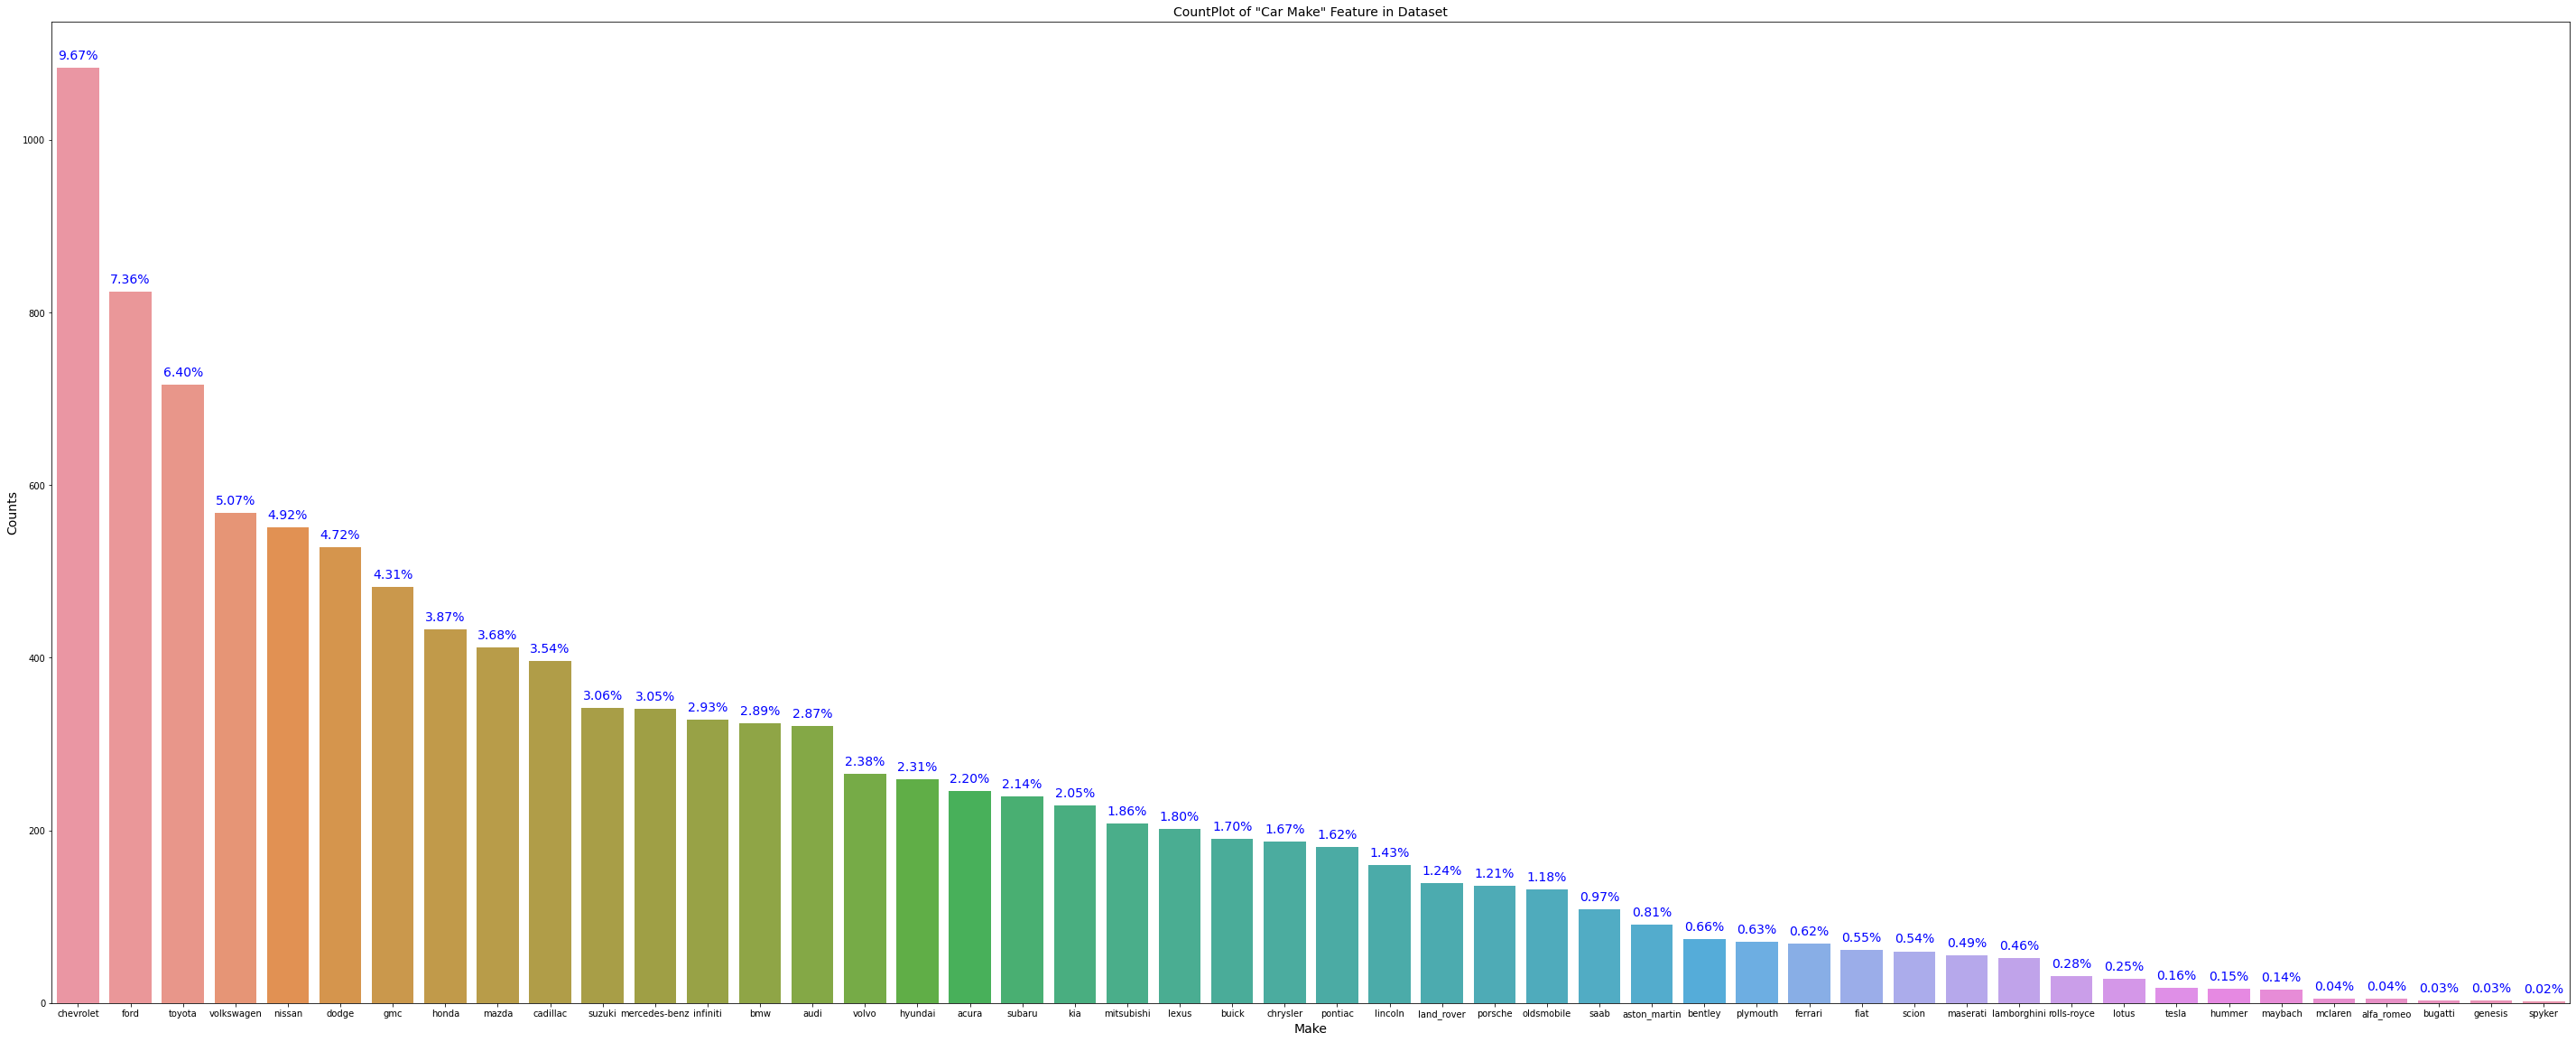

In [20]:
plt.figure(figsize=(50,20))
sns.countplot('make' , data = df , order=Car_Make.index)
plt.title('CountPlot of "Car Make" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Make', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(Car_Make)):  ## loop over the numbers of categories (number of bars)
    each_count = Car_Make.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count+10, s=each_text, c='b', fontsize=14, ha='center')

**Checking relationship of `make` with `log_price`**

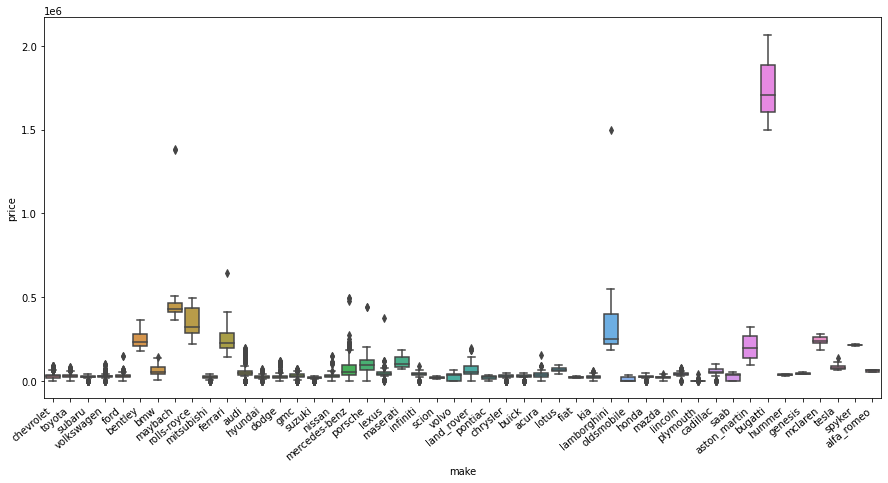

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='make',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Relationship of `log_price` with `engine_fuel_type`, `year` and `make` mixed**

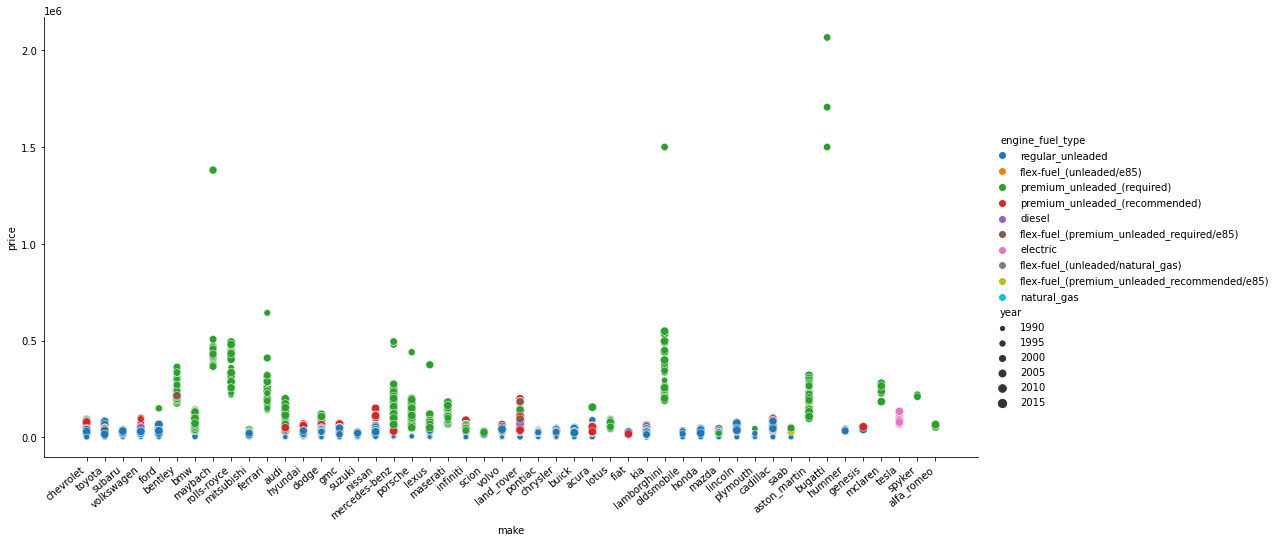

In [22]:
ax=sns.relplot(x='make',y='price',data=df,hue='engine_fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

**Checking relationship of `highway_mpg` with `log_price`**

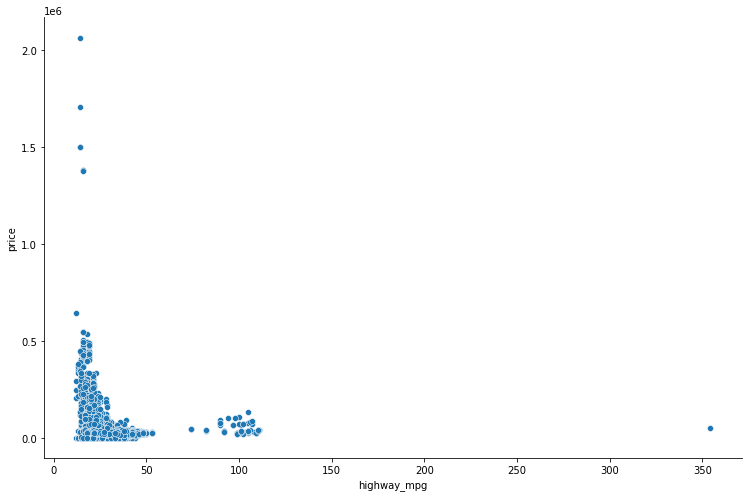

In [23]:
sns.relplot(x='highway_mpg',y='price',data=df,height=7,aspect=1.5)

**Checking relationship of `city_mpg` with `log_price`**

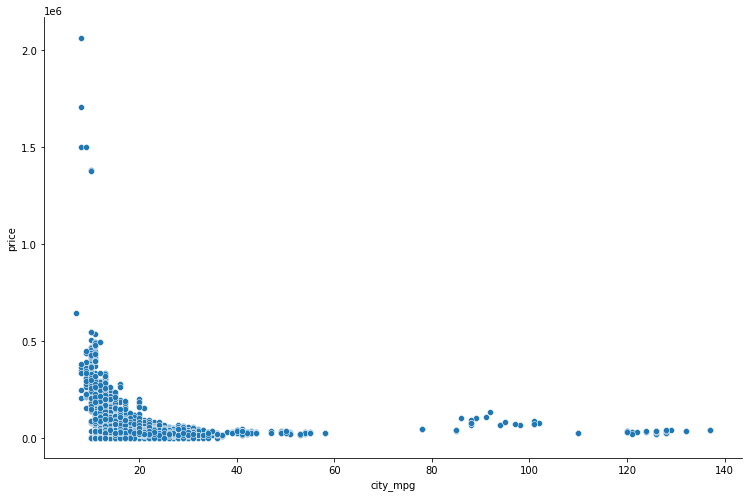

In [24]:
sns.relplot(x='city_mpg',y='price',data=df,height=7,aspect=1.5)

**Checking relationship of `engine_fuel_type` with `log_price`**

<AxesSubplot:xlabel='engine_fuel_type', ylabel='price'>

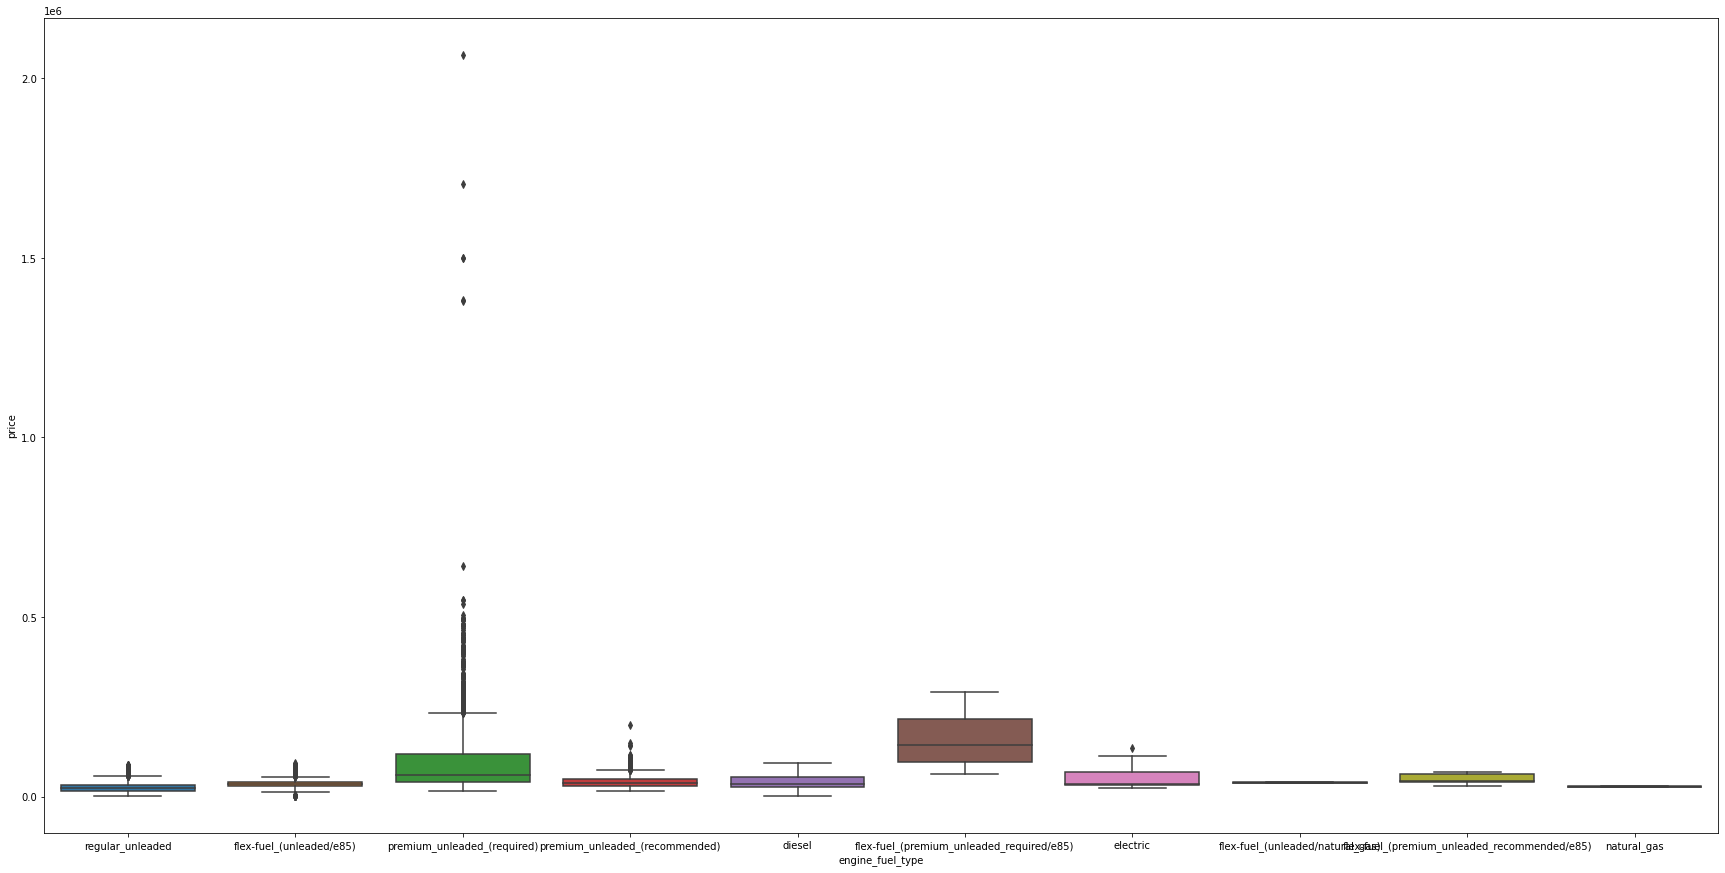

In [25]:
plt.subplots(figsize=(30,15))
sns.boxplot(x='engine_fuel_type',y='price',data=df)

**Histogram Distr. of `Numerical Features` in Dataset**

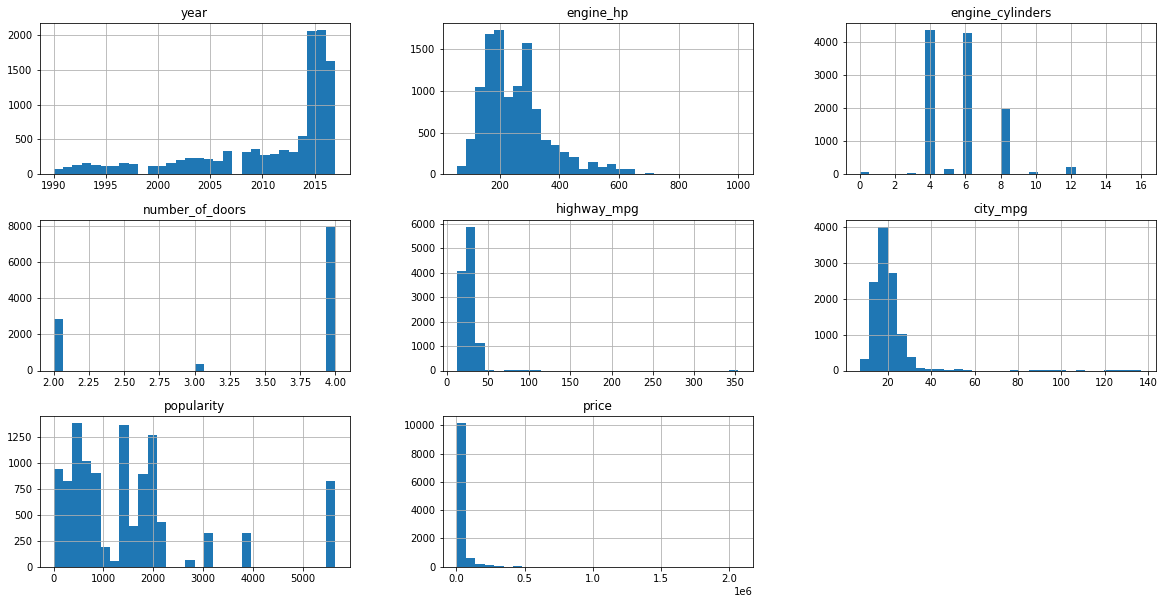

In [26]:
df.hist(bins=30, figsize=(20, 10))
plt.show()                        

>**Cut this Numerical Feature `price` to Categorical One**

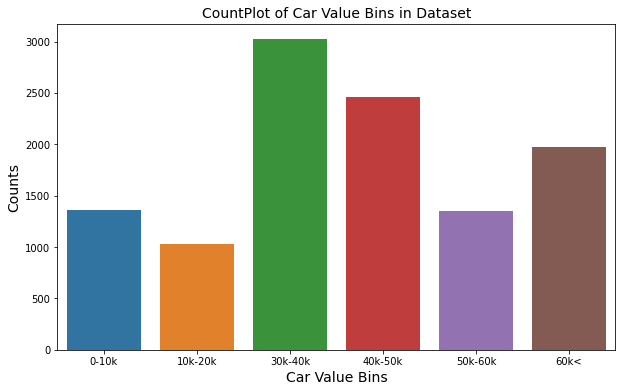

In [27]:
car_value_bins = pd.cut(x=df['price'], 
                          bins=[-np.inf, 10000, 20000, 30000, 40000, 50000, np.inf],
                          labels=['0-10k', '10k-20k', '30k-40k', '40k-50k', '50k-60k', '60k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=car_value_bins)
plt.title('CountPlot of Car Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Car Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

>**We notice that most of cars in the data have price from `30k to 50k`**

In [28]:
df.corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
year,1.000000,0.336117,-0.034402,0.247207,0.244912,0.188413,0.085986,0.209598
engine_hp,0.336117,1.000000,0.788439,-0.129489,-0.415522,-0.446891,0.042433,0.659178
engine_cylinders,-0.034402,0.788439,1.000000,-0.150167,-0.617499,-0.598751,0.038330,0.538764
number_of_doors,0.247207,-0.129489,-0.150167,1.000000,0.114615,0.120684,-0.057451,-0.145014
highway_mpg,0.244912,-0.415522,-0.617499,0.114615,1.000000,0.886306,-0.017043,-0.166650
city_mpg,0.188413,-0.446891,-0.598751,0.120684,0.886306,1.000000,-0.000427,-0.162362
popularity,0.085986,0.042433,0.038330,-0.057451,-0.017043,-0.000427,1.000000,-0.048319
price,0.209598,0.659178,0.538764,-0.145014,-0.166650,-0.162362,-0.048319,1.000000


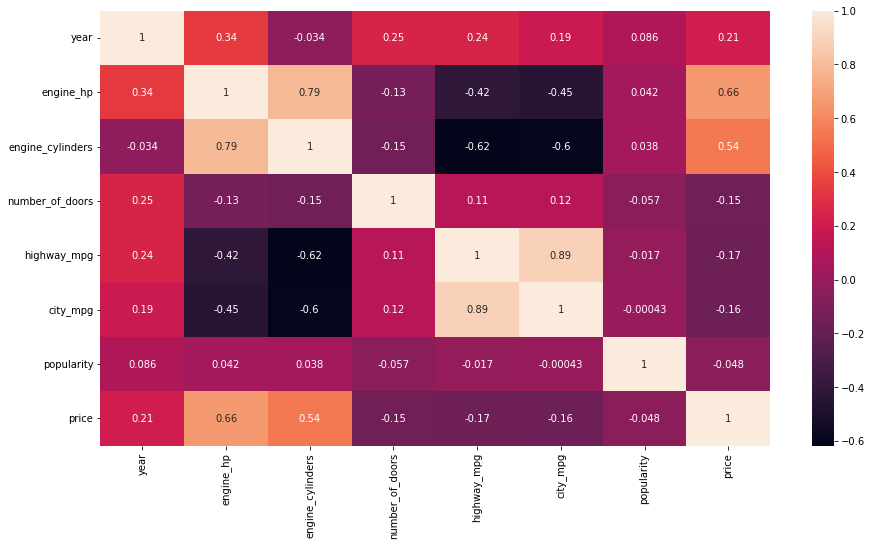

In [29]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(), annot = True)

## 4) analysis (price)

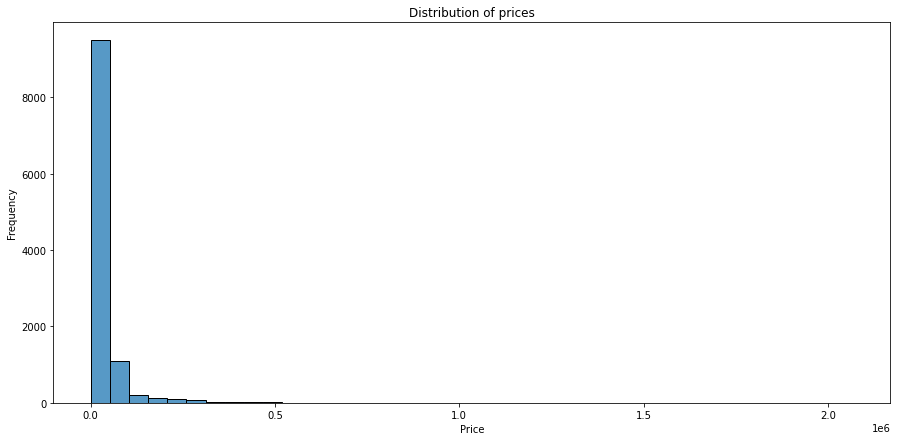

In [30]:
plt.figure(figsize=(15, 7))

sns.histplot(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

>**This is a `long tail` distribution, which is a typical situation for many items with low prices and very few expensive ones.**

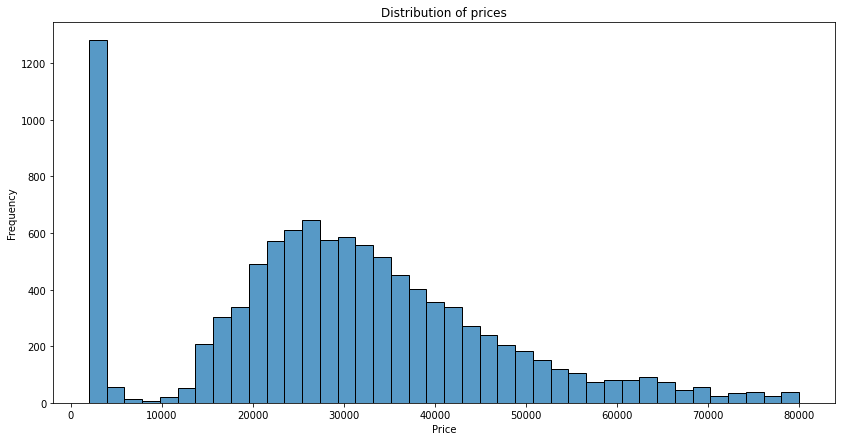

In [31]:
plt.figure(figsize=(14, 7))

sns.histplot(df.price[df.price < 80000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

>**The `long tail` makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough.**
>>**we hande it by using `log transformation`.** 

## 5) Log Transformation For Price

**Add New Column `log_price` and plt it**

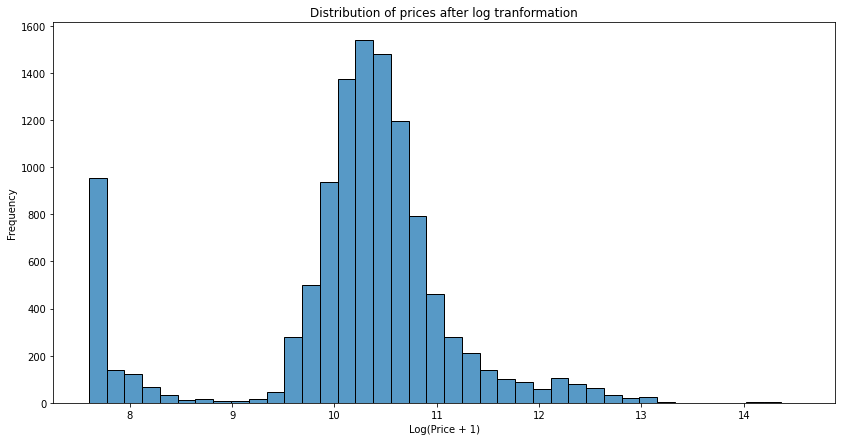

In [32]:
df['log_price'] = np.log1p(df.price)

plt.figure(figsize=(14, 7))

sns.histplot(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

>**The effect of the `long tail` is removed**

>**The `price+1` part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero.** 


## 5) Check The Nulls

In [33]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
price                 0
log_price             0
dtype: int64

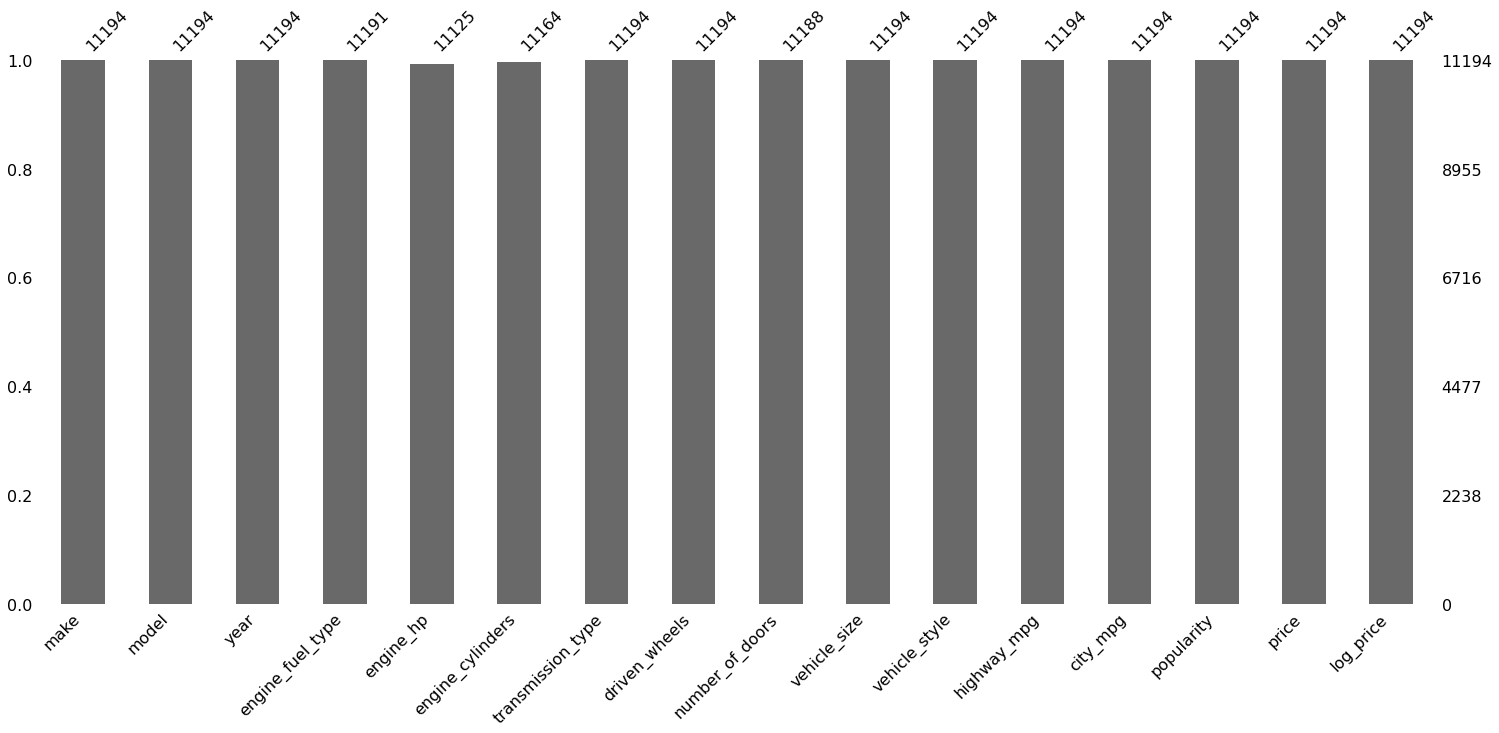

In [34]:
## check nulls using (missingno) library
missingno.bar(df);

>**It seems that Dataset is a contains 11914 instances and `3742` null values in `market_category` , `3` null values in `engine_fuel_type` , `69` null values in `engine_hp` and `30` null values in `engine_cylinders` features.**

**File the null values in numerical columns `engine_hp` , `engine_cylinders` and `number_of_doors`**

In [35]:
df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].median())
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].median())
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].median())

## 6) Applying Train Test Split

In [36]:
#x = df.drop(['price' , 'log_price' , 'market_category' ] , axis=1)
X = df.drop(['price' , 'log_price' ,'popularity'] , axis=1)
y = df['log_price']

In [52]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (9514, 13)
y_train shape --  (9514,)
X_test shape --  (1680, 13)
y_test shape --  (1680,)


**Show the categorical columes**

In [53]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg']
********************************************************************************
Categorical Columns : 
 ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style']


## 7) Handling Categorical Variables

**handle `categorical columns` ( to be transformed into numerical form)**

In [54]:
#ohe=OneHotEncoder()
#ohe.fit(x[['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style']])

**Creating a `column transformer` to transform categorical columns**

In [55]:
'''column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                    ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style']),
                                    remainder='passthrough')'''

"column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),\n                                    ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style']),\n                                    remainder='passthrough')"

In [56]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False , handle_unknown='ignore'))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

In [57]:
X_train_final.shape , X_test_final.shape

((9514, 995), (1680, 995))

**Linear Regression Model**

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train_final, y_train) 

LinearRegression()

In [60]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lr, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
rmse_scores_lin.mean()

1346353155.3580742

In [61]:
y_pred_lin = cross_val_predict(estimator=lr, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
rmse_pred_lin

2196742977.4275064

In [46]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lr, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lr, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE Scores Using LinearRegression --- [1.22183590e+08 6.06474836e+08 3.52201850e+08 1.20805315e+08
 1.30473966e+08]
Mean of RMSE Scores Using LinearRegression --- 266427911.5246
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 328162070.8842


In [ ]:
##y_pred = lr.predict(X_test_final)

In [ ]:
''''def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)'''

In [ ]:
#rmse(y_test,y_pred)

**Making a pipeline**

**Checking R2 Score**

In [86]:
i = 10000
ad = df.iloc[i].to_dict()
ad

{'make': 'lincoln',
 'model': 'mkz',
 'year': 2017,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 245.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 31,
 'city_mpg': 21,
 'popularity': 61,
 'price': 47670,
 'log_price': 10.772078525532862}

In [82]:
test1 = {
 'make': 'bmw',
 'model': 'm3',
 'year': 2023,
 'engine_fuel_type': 'natural_gas',
 'engine_hp': 503.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan'
}

In [65]:
test = {
 'make': 'volvo',
 'model': '240',
 'year': 1993,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 114.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 26,
 'city_mpg': 19,
 'popularity': 870,
 'price': 2000,
 'log_price': 7.601402334583733
}

In [87]:
 X_test = pd.DataFrame([ad])

In [88]:
#X_test = pd.DataFrame([test])

In [89]:
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

In [90]:
y_pred = lr.predict(X_test_final)
y_pred

array([10.74497986])

In [91]:
suggestion = np.expm1(y_pred)
suggestion

array([46395.52570662])

In [ ]:
#import pickle

In [ ]:
#pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [93]:
## Download using joblib
joblib.dump(lr, 'LinearRegressionModel.pkl')

['LinearRegressionModel.pkl']

In [94]:
## to load this pretrained Model
loaded_model = joblib.load('LinearRegressionModel.pkl')
loaded_model

LinearRegression()